In [1]:
import numpy as np
import xarray as xr
import netCDF4
import os
import datetime
import matplotlib.pyplot as plt 
from matplotlib import cm
import shutil
from datetime import datetime, timedelta
import glob
import datetime as dt
from os import path
import cartopy.crs as ccrs
import os
from datetime import timezone
import seaborn as sns
import pandas as pd



In [2]:
plt.style.use('dark_background')

In [3]:
folder="/Volumes/SPARK/bafu/aare/"

## Authorship

Author: Martin Wegmann

Date: 11th July 2023

Contact: martinwegmann@pm.me

## read in data

data provided on request by https://www.bafu.admin.ch/bafu/en/home/topics/water/state/data/obtaining-monitoring-data-on-the-topic-of-water/hydrological-data-service-for-watercourses-and-lakes.html

In [4]:
df2 = pd.read_csv(folder+"2135_Wassertemperatur_Tagesmittel_1971-01-01_2023-07-11_modified.csv", delimiter = ";")

## extract what we need

In [5]:
wasser_temp_daily=pd.DataFrame(df2["Wert"].values, index=pd.period_range(df2["Zeitstempel"].values[0], df2["Zeitstempel"].values[-1],freq="1D"))

In [6]:
wasser_temp_daily.columns = ["Temp"]

## postprocess

In [7]:
wasser_temp_monthly=wasser_temp_daily.resample("1M").mean()

In [8]:
wasser_temp_monthly=wasser_temp_monthly['19710101':'20221231']

In [9]:
wasser_temp_monthly_climate=wasser_temp_monthly['19810101':'20101231']

In [10]:
wasser_temp_monthly_early=wasser_temp_monthly['19810101':'20001231']

In [11]:
wasser_temp_daily_early=wasser_temp_daily['19810101':'20001231']

In [12]:
wasser_temp_monthly_late=wasser_temp_monthly['20010101':'20221231']

In [13]:
wasser_temp_daily_late=wasser_temp_daily['20010101':'20221231']

## create anomalies

In [14]:
wasser_temp_monthly_reshaped=wasser_temp_monthly.values.reshape(52,12)

In [15]:
wasser_temp_monthly_climate_reshaped=wasser_temp_monthly_climate.values.reshape(30,12)

In [16]:
wasser_temp_monthly_climate_reshaped=wasser_temp_monthly_climate_reshaped.mean(axis=0)



In [17]:
monthly_anomalies=wasser_temp_monthly_reshaped-wasser_temp_monthly_climate_reshaped

In [18]:
monthly_anomalies.max()

3.8144555555555524

## plotting

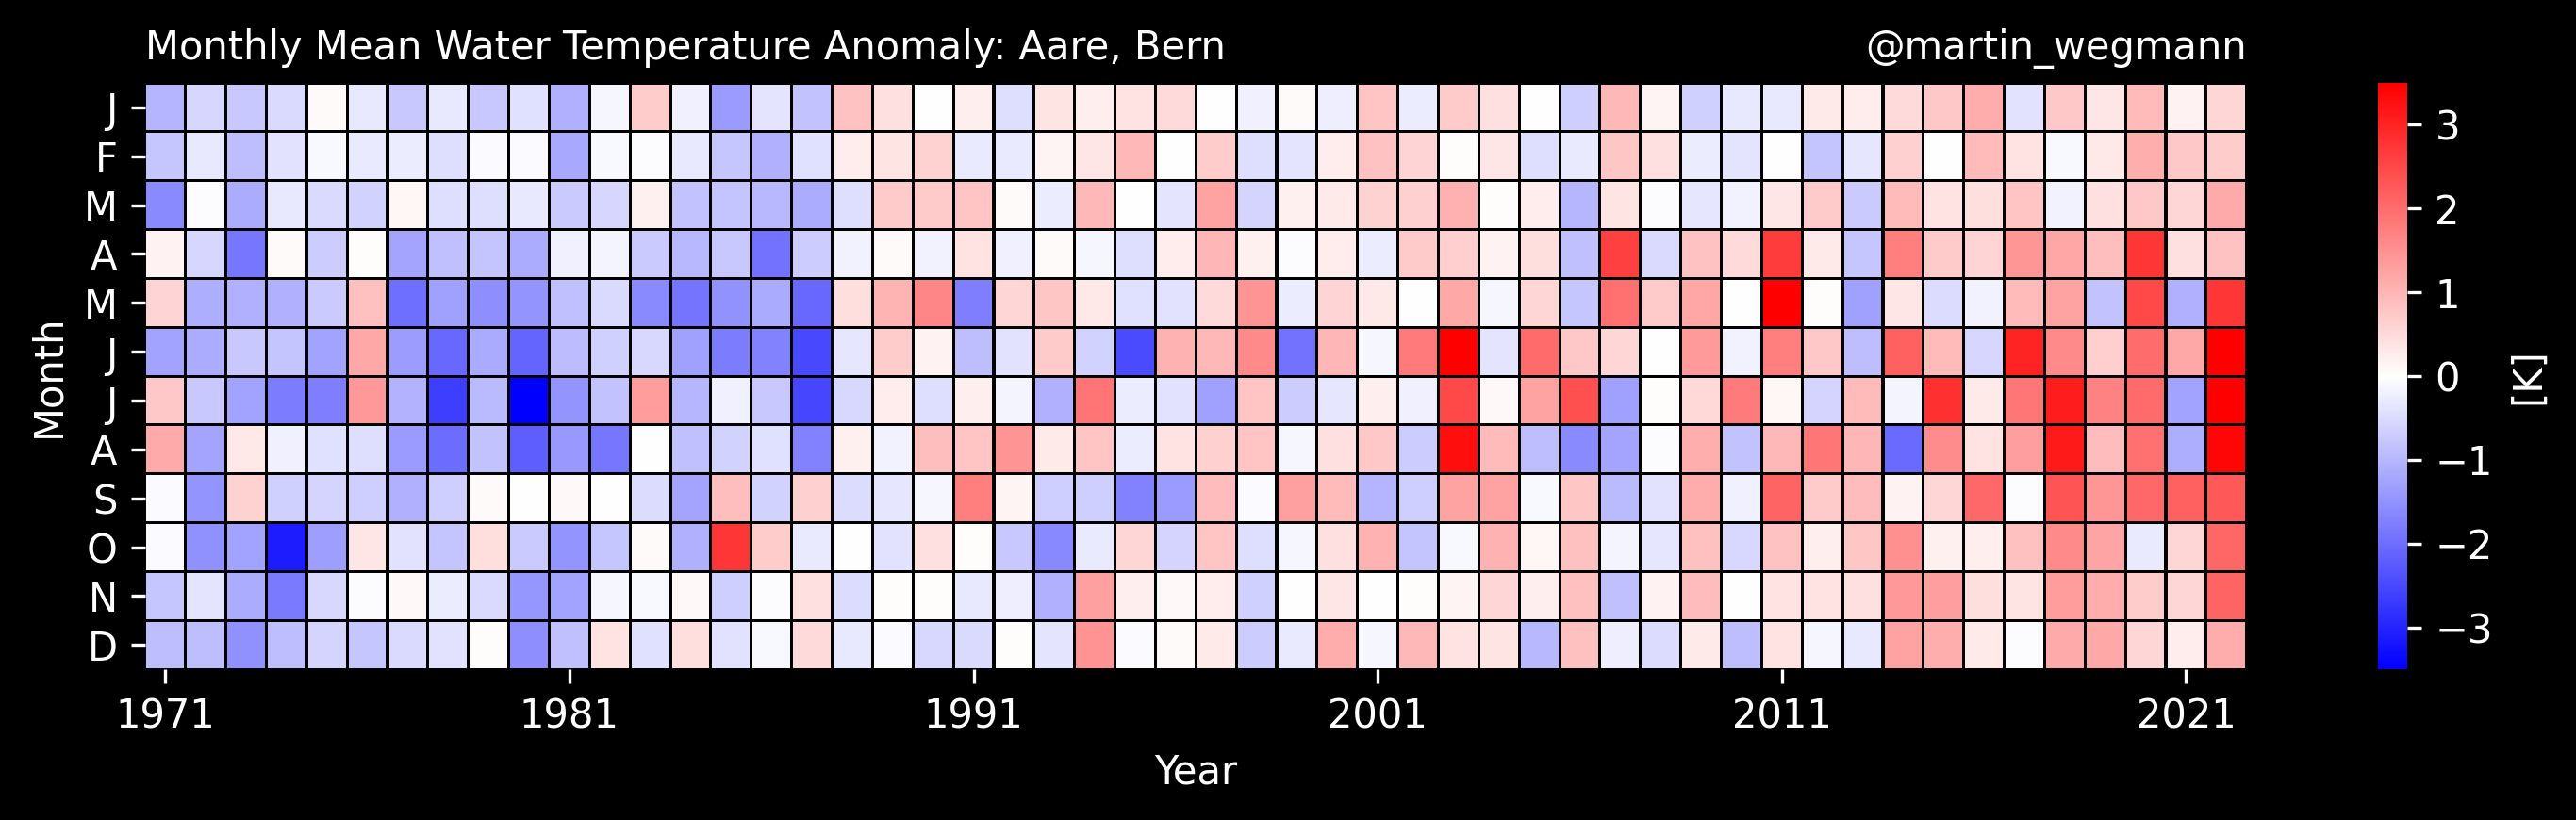

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(10, 3), dpi= 300)
ax = sns.heatmap(monthly_anomalies.transpose(), linewidth=0.5, linecolor='black',vmin=-3.5,vmax=3.5,cmap="bwr")
ax.set(xlabel="Year", ylabel="Month")
ax.tick_params(axis='both', which='major', labelsize=10)
#ax.set_yticklabels(["01","02","03","04","05","06","07","08","09","10","11","12"])
ax.set_yticklabels(["J","F","M","A","M","J","J","A","S","O","N","D"])
#ax.set_yticklabels(["J","M","M","J","S","N"])
ax.set_xticks([0.5,10.5,20.5,30.5,40.5,50.5])

ax.set_xticklabels(["1971","1981","1991","2001","2011","2021"])
ax.collections[0].colorbar.set_label("[K]")
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.title("@martin_wegmann",loc="right",size=10)
plt.title("Monthly Mean Water Temperature Anomaly: Aare, Bern",loc="left",size=10)
#ax.set_xticklabels([str(np.arange(1951,2023))])
plt.tight_layout()
plt.savefig(folder+"MonthlyMeanWaterTemperatureAnomalyAareBern.pdf")
plt.savefig(folder+"MonthlyMeanWaterTemperatureAnomalyAareBern.png")

